In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../input/titanic/train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**UNIVARIATE ANALYSIS**


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

**1. Pclass**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

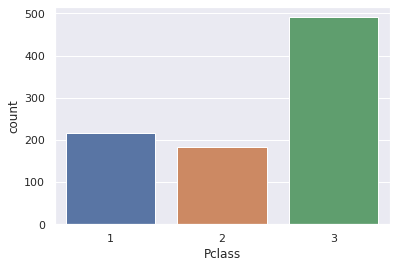

In [6]:
sns.countplot(x = data.Pclass)

**2. Sex**

<AxesSubplot:xlabel='Sex', ylabel='count'>

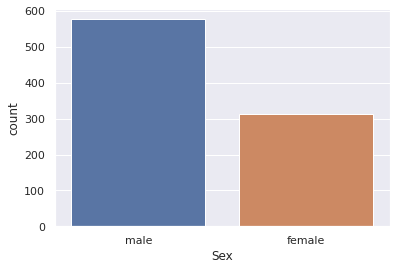

In [7]:
sns.countplot(x = data.Sex)

**3. Age**

In [8]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

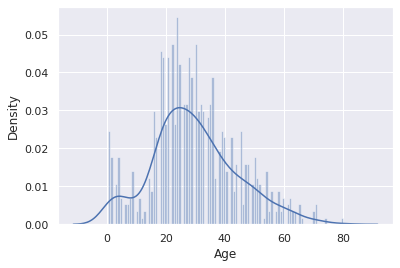

In [9]:
sns.distplot(data.Age, bins = 100)

**4. SibSp**

<AxesSubplot:xlabel='SibSp', ylabel='count'>

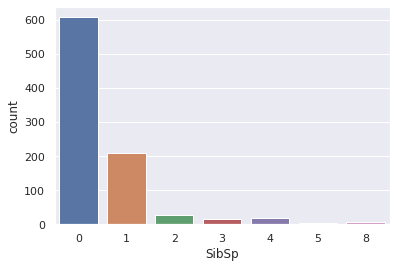

In [10]:
sns.countplot(data.SibSp)

**5. Parch**

<AxesSubplot:xlabel='Parch', ylabel='count'>

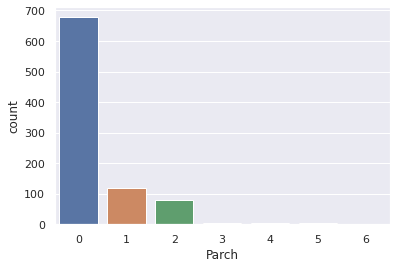

In [11]:
sns.countplot(data.Parch)

**6. Fare**

In [12]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

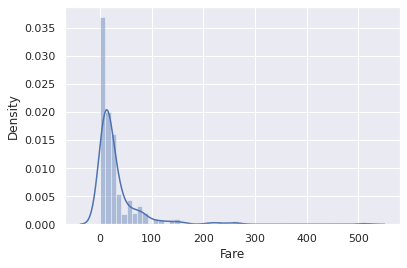

In [13]:
sns.distplot((data.Fare), bins = 50)

**7. Cabin**

In [14]:
data.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

**8. Embarked**

In [15]:
data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

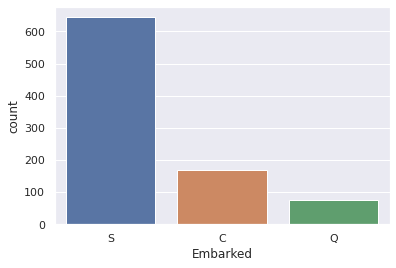

In [16]:
sns.countplot(data.Embarked)

**BIVARIATE ANALYSIS**

**Pclass and Survival**

In [17]:
pd.crosstab(data['Pclass'], data['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [18]:
survival_percent = data.groupby('Pclass')['Survived'].mean().reset_index()
survival_percent

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Percentage of survivors based on Pclass')

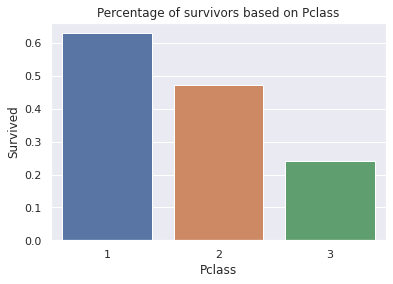

In [19]:
sns.barplot( data=survival_percent,x="Pclass", y="Survived")
plt.title('Percentage of survivors based on Pclass')

**Sex and Survival**

In [20]:
pd.crosstab(data['Sex'], data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


Text(0.5, 1.0, 'Percentage of survivors based on Sex')

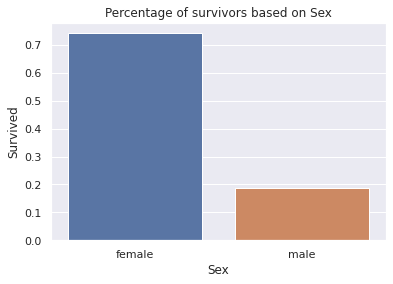

In [21]:
sns.barplot( data = data.groupby('Sex')['Survived'].mean().reset_index() ,x="Sex", y="Survived")
plt.title('Percentage of survivors based on Sex')

**Parch and Survival**


In [22]:
pd.crosstab(data['Parch'], data['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Text(0.5, 1.0, 'Percentage of survivors based on Parch')

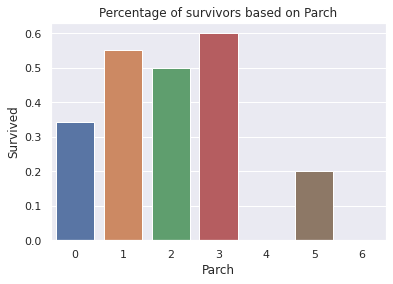

In [23]:
sns.barplot( data = data.groupby('Parch')['Survived'].mean().reset_index() ,x="Parch", y="Survived")
plt.title('Percentage of survivors based on Parch')

**SibSp and Survival**

In [24]:
pd.crosstab(data['SibSp'], data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'Percentage of survivors based on SibSp')

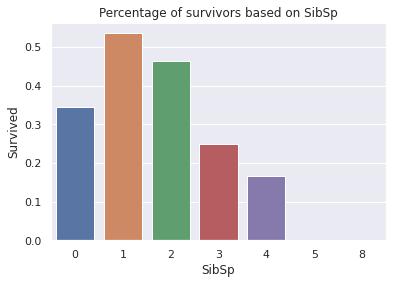

In [25]:
sns.barplot( data = data.groupby('SibSp')['Survived'].mean().reset_index() ,x="SibSp", y="Survived")
plt.title('Percentage of survivors based on SibSp')

**Embarked and Survival**

In [26]:
pd.crosstab(data['Embarked'], data['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


Text(0.5, 1.0, 'Percentage of survivors based on Embarked')

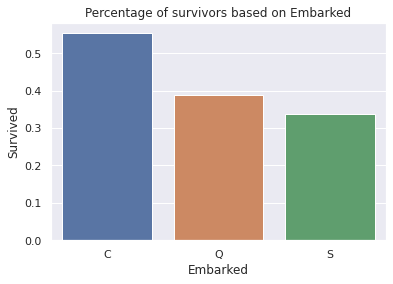

In [27]:
sns.barplot( data = data.groupby('Embarked')['Survived'].mean().reset_index() ,x="Embarked", y="Survived")
plt.title('Percentage of survivors based on Embarked')




**COMBINING TEST AND TRAIN DATA**


In [28]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

df = pd.concat([train, test])

df.reset_index(drop = True, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.shape

(1309, 12)


**FILLING MISSING VALUES**


In [30]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [31]:
df.Fare.fillna(df.Fare.median(), inplace = True)

In [32]:
df.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [33]:
df.Embarked.fillna('S', inplace = True)

**Extracting Titles as 'Age' can be filled according to titles**

In [34]:
df['title'] = df.Name.str.extract('([A-Za-z]+)\.')
df['title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: title, Length: 1309, dtype: object

In [35]:
pd.crosstab(df['title'],df['Sex'] )

Sex,female,male
title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [36]:
df.groupby('title')['Age'].median().reset_index()

,title,Age
0,Capt,70.0
1,Col,54.5
2,Countess,33.0
3,Don,40.0
4,Dona,39.0
5,Dr,49.0
6,Jonkheer,38.0
7,Lady,48.0
8,Major,48.5
9,Master,4.0


In [37]:
df.loc[df.Age.isna(), 'Age'] = df.groupby('title')['Age'].transform('median')

In [38]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
title             0
dtype: int64

In [39]:
na_percent_cabin = df.Cabin.isna().sum()/df.shape[0]*100
na_percent_cabin

77.46371275783041


**CORRELATION HEATMAP**


<AxesSubplot:>

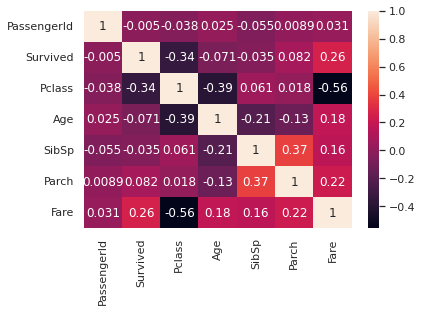

In [40]:
sns.heatmap(df.corr(), annot = True)


**FEATURE ENGINEERING**



SEX, EMBARKED AND PCLASS AS OBJECT


In [41]:
df['family_members'] = df.Parch + df.SibSp

In [42]:
df['IsAlone'] = (df['family_members']>0).astype('int64')

In [43]:
pd.qcut(df['Fare'], 4).value_counts()

(-0.001, 7.896]      337
(14.454, 31.275]     328
(31.275, 512.329]    323
(7.896, 14.454]      321
Name: Fare, dtype: int64

In [44]:
df.loc[df['Fare'] <= 7.8, 'FareBand'] = 0
df.loc[(df['Fare'] > 7.8) & (df['Fare'] <= 14.5), 'FareBand'] = 1
df.loc[(df['Fare'] > 14.5) & (df['Fare'] <= 31.27), 'FareBand'] = 2
df.loc[df['Fare'] > 31.27, 'FareBand'] = 4


In [45]:
df.FareBand = df.FareBand.astype('int64')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family_members,IsAlone,FareBand
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1


In [46]:
bins = [1,19,30,50,100]
labels = ['minor','young','old','very_old']

df['age_range'] = pd.cut(df['Age'],bins = bins, labels = labels)

In [47]:
df['age_range'] = df.age_range.map({'minor':0,'young':1,'old':2,'very_old':3})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family_members,IsAlone,FareBand,age_range
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,4,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,4,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1,2


In [48]:
df['title'] = df['title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [49]:
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,family_members,IsAlone,FareBand,age_range
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,4,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,4,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1,2


**Drop unnecessary columns**

In [50]:
drop_cols = ['Name', 'Ticket', 'Cabin', 'Fare', 'Age', 'Parch', 'SibSp', ]
df.drop(drop_cols, axis = 1, inplace = True)


**LABEL ENCODING**


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['Sex', 'Embarked', 'title']
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['title'] = le.fit_transform(df['title'])

In [52]:
df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,title,family_members,IsAlone,FareBand,age_range
0,1,0.0,3,1,2,2,1,1,0,1
1,2,1.0,1,0,0,3,1,1,4,2
2,3,1.0,3,0,2,1,0,0,1,1
3,4,1.0,1,0,2,3,1,1,4,2
4,5,0.0,3,1,2,2,0,0,1,2


**Variance Inflation Factor**

In [53]:
cat = df.select_dtypes(['int64', 'float64'])
cat = cat[cat['Survived'].notna()]
cat.Survived.isnull().sum()

0

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(cat.values, i) for i in range(cat.shape[1])], index =cat.columns)
VIF

PassengerId       3.862955
Survived          2.271541
Pclass            7.641692
Sex               3.857327
Embarked          4.801827
title             6.408511
family_members    3.356480
IsAlone           3.848880
FareBand          4.884309
dtype: float64

<AxesSubplot:>

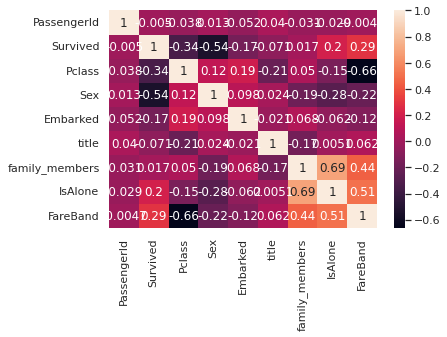

In [55]:
sns.heatmap(df.corr(), annot = True)

**Separating train and test data**

In [56]:
traindata = df[df.Survived.notna()]
traindata.Survived = traindata.Survived.astype('int64')

In [57]:
testdata = df[df.Survived.isna()]

In [58]:
testdata.drop('Survived', inplace = True, axis = 1)

**Splitting into train and validation data**

In [59]:
X = traindata
y = traindata.pop('Survived')

In [60]:
from sklearn.model_selection import train_test_split as tts

train_x, valid_x, train_y, valid_y = tts(X, y, test_size = 0.15, stratify = y, random_state = 45)

In [61]:
train_y.value_counts(normalize = True)

0    0.615588
1    0.384412
Name: Survived, dtype: float64

In [62]:
valid_y.value_counts(normalize=True)

0    0.619403
1    0.380597
Name: Survived, dtype: float64


**MODEL BUILDING - DECISION TREE**


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 

In [64]:
dt = DecisionTreeClassifier( random_state = 0)
dt.fit(train_x, train_y)

DecisionTreeClassifier(random_state=0)

In [65]:
#training score
dt.score(train_x, train_y)

1.0

In [66]:
#validation score
dt.score(valid_x, valid_y)

0.7313432835820896

In [67]:
predictions_dt = dt.predict(valid_x)
f1_score(predictions_dt, valid_y)

0.6896551724137931


**Making predictions using predict_proba function**


In [68]:
y_pred = dt.predict_proba(valid_x)[:,1]

In [69]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [70]:
print(f1_score(valid_y, y_new))
accuracy_score(valid_y, y_new)


0.6896551724137931


0.7313432835820896

**Changing max depth**

In [71]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    validation_accuracy.append(dt_model.score(valid_x, valid_y))

In [72]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.783355,0.805970
1,2,0.785997,0.791045
2,3,0.807133,0.828358
3,4,0.826948,0.798507
4,5,0.852048,0.858209


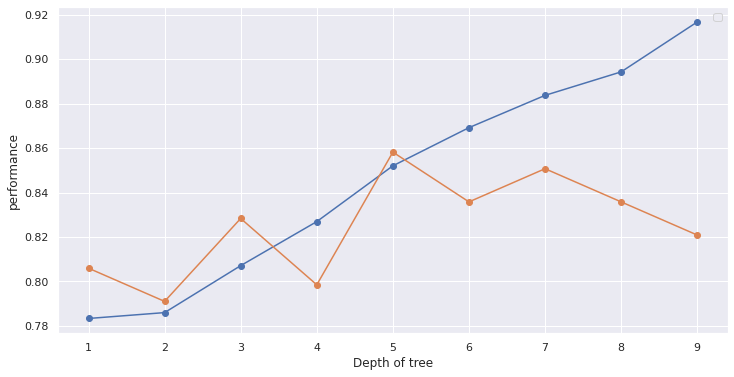

In [73]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [74]:
m_depth = [4,5,6,7]

for depth in m_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    model.fit(train_x, train_y)
    pred = model.predict(valid_x)
    print('f1 score :', f1_score(pred, valid_y), 'for depth', depth)
    print('accuracy score :',accuracy_score(pred, valid_y), 'for depth', depth)
    print()
          

f1 score : 0.7522935779816514 for depth 4
accuracy score : 0.7985074626865671 for depth 4

f1 score : 0.8224299065420562 for depth 5
accuracy score : 0.8582089552238806 for depth 5

f1 score : 0.7799999999999999 for depth 6
accuracy score : 0.835820895522388 for depth 6

f1 score : 0.8076923076923077 for depth 7
accuracy score : 0.8507462686567164 for depth 7



choosing max_depth as 6

In [75]:
my_model = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 8,random_state = 10)

In [76]:
my_model.fit(train_x, train_y)
print(my_model.score(train_x, train_y))
my_model.score(valid_x, valid_y)

0.8203434610303831


0.8955223880597015

In [77]:
preds = my_model.predict(valid_x)
print(f1_score(preds, valid_y))
print(accuracy_score(preds, valid_y))

0.8541666666666666
0.8955223880597015



**Decision tree visualization**

In [78]:
from sklearn import tree

In [79]:
decision_tree = tree.export_graphviz(model,out_file='tree.dot',feature_names = train_x.columns, max_depth = 3,filled=True)

In [80]:
!dot -Tpng tree.dot -o tree.png

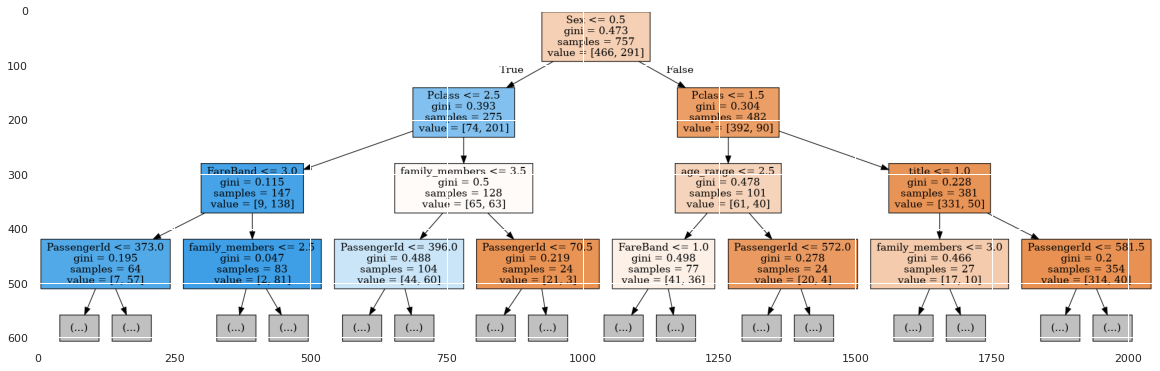

In [81]:
image = plt.imread('tree.png')
plt.figure(figsize=(20,20))
plt.imshow(image)

In [82]:
testdata

,PassengerId,Pclass,Sex,Embarked,title,family_members,IsAlone,FareBand,age_range
891,892,3,1,1,2,0,0,1,2
892,893,3,0,2,3,1,1,0,2
893,894,2,1,1,2,0,0,1,3
894,895,3,1,2,2,0,0,1,1
895,896,3,0,2,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...
1304,1305,3,1,2,2,0,0,1,1
1305,1306,1,0,0,4,0,0,4,2
1306,1307,3,1,2,2,0,0,0,2
1307,1308,3,1,2,2,0,0,1,1


In [83]:
predictions = my_model.predict(testdata)
output = pd.DataFrame({'PassengerId': testdata.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
